<a href="https://colab.research.google.com/github/Sanku1234/Data-Science-lab/blob/main/04_Datapreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


from google.colab import files
uploaded = files.upload()
print(uploaded)


Saving Myuberdrive.csv to Myuberdrive.csv
{'Myuberdrive.csv': b"START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*\n1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain\n1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5,\n1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies\n1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting\n1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit\n1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain\n1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting\n1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting\n1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting\n1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit\n1/10/2016 15:08,1/10/2016 15:51,Business,New York,Queens,10.8,Meeting\n1/10/2016 18:18,1/10/2016 1

In [2]:
df = pd.read_csv("Myuberdrive.csv")
print(df.head())
print(df.info())


      START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0              NaN  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   

In [3]:
#Handling the missing value

print(df.isnull().sum())

#option1 : Drop missing values
df_cleaned = df.dropna()

#option2 : Fill missing values
df['PURPOSE*'].fillna('Unknown', inplace=True)


START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


/tmp/ipython-input-2305925019.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE*'].fillna('Unknown', inplace=True)


In [4]:
#removing the duplicate value
#check duplicate value

print("Duplicate:", df.duplicated().sum())

#remove duplicate value
df_cleaned = df.drop_duplicates()



Duplicate: 1


In [5]:
#Handling Date and Time
#Convert START_DATE* to datetime

df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], errors='coerce')

#extract useful features
df['Date'] = df['START_DATE*'].dt.date
df['Month'] = df['START_DATE*'].dt.month
df['Day'] = df['START_DATE*'].dt.day
df['Weekday'] = df['START_DATE*'].dt.day_name()
df['Hour'] = df['START_DATE*'].dt.hour

In [6]:
#one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['CATEGORY*', 'PURPOSE*'], drop_first=True)



In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['MILES*']] = scaler.fit_transform(df_scaled[['MILES*']])

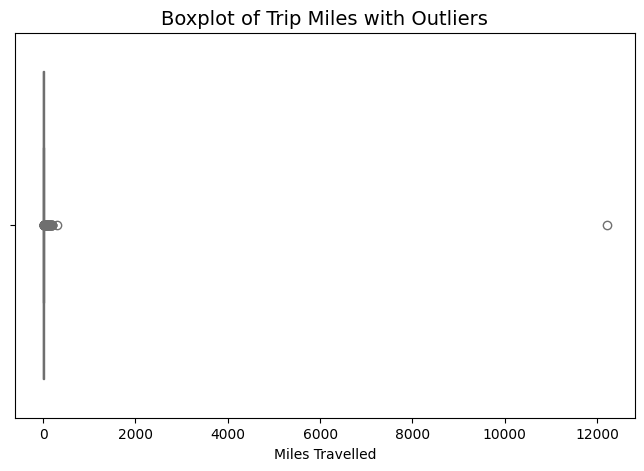

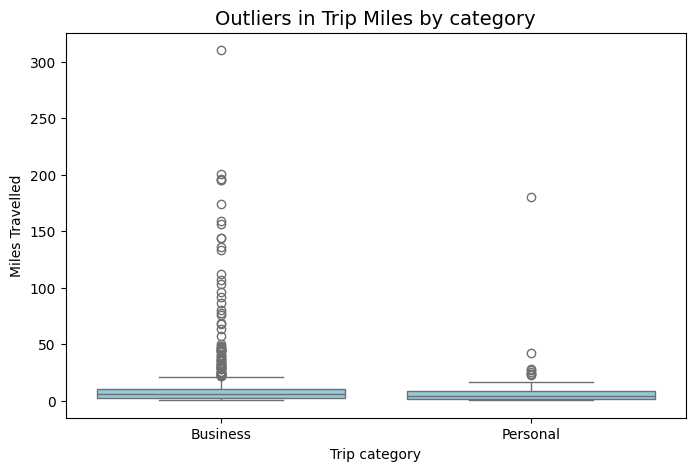

In [8]:
 #outlier detection

 import matplotlib.pyplot as plt
 import seaborn as sns

 #Boxplot
 plt.figure(figsize=(8, 5))
 sns.boxplot(x=df['MILES*'], color="skyblue")

 #add title and labels
 plt.title("Boxplot of Trip Miles with Outliers", fontsize=14)
 plt.xlabel("Miles Travelled")

plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="CATEGORY*", y="MILES*", data=df, color="skyblue")

plt.title("Outliers in Trip Miles by category", fontsize=14)
plt.xlabel("Trip category")
plt.ylabel("Miles Travelled")

plt.show()

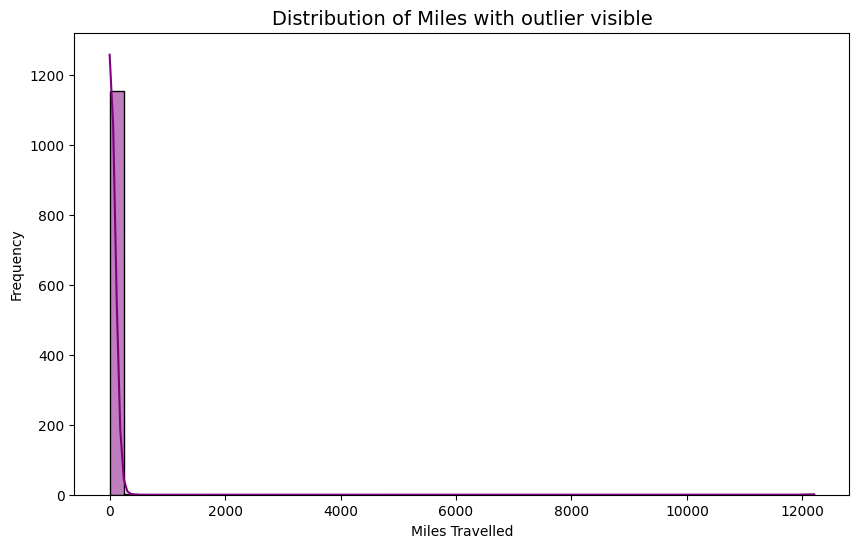

In [9]:
#Histogram+KDE
plt.figure(figsize=(10,6))
sns.histplot(df['MILES*'], bins=50,kde=True, color='purple')

plt.title("Distribution of Miles with outlier visible", fontsize=14)
plt.xlabel("Miles Travelled")
plt.ylabel("Frequency")

plt.show()

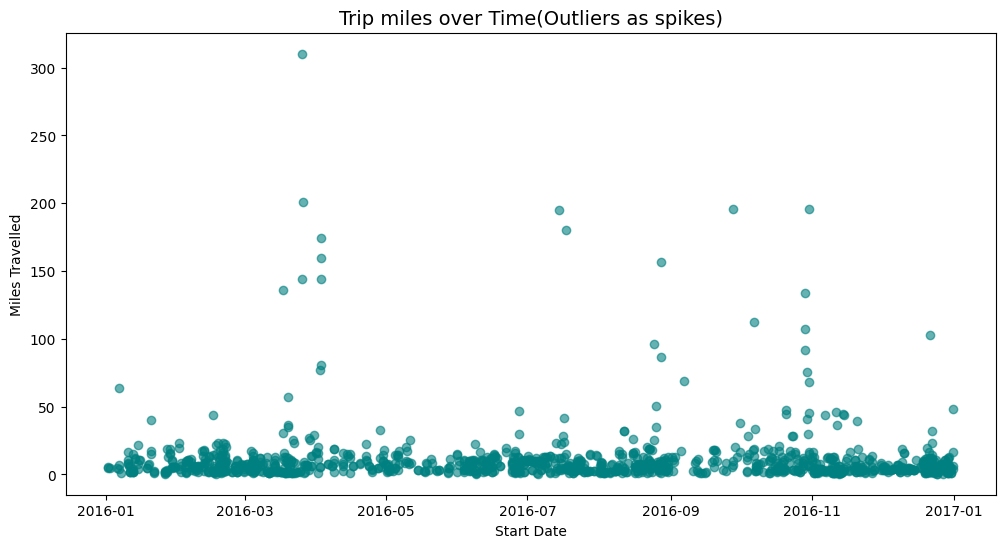

In [11]:
plt.figure(figsize=(12,6))
plt.scatter(df['START_DATE*'], df['MILES*'], alpha=0.6, color='teal')

plt.title("Trip miles over Time(Outliers as spikes)", fontsize=14)
plt.xlabel("Start Date")
plt.ylabel("Miles Travelled")
plt.show()


In [12]:
#Heighlight Outliers on Boxplot, IQR Method

Q1 = df['MILES*'].quantile(0.25)
Q3 = df['MILES*'].quantile(0.75)
IQR = Q3 - Q1

#define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#find outliers and count them
outliers = df[(df['MILES*'] < lower_bound) | (df['MILES*'] > upper_bound)]
print("Number of Outlier:", len(outliers))



Number of Outlier: 78


In [13]:
from scipy import stats
import numpy as np

#z-score calculation
z_score = np.abs(stats.zscore(df['MILES*']. dropna()))

#mark values with z>3 as outliers
outliers = np.where(z_score > 3)
print("Number of Outlier:", len(outliers))


Number of Outlier: 1


In [14]:
#option 1: Remove outlier(using IQR)

df_no_outliers = df[(df['MILES*'] >= lower_bound) & (df['MILES*'] <= upper_bound)]

# option 2: cap outliers(winsorization)

df_capped = df.copy()
import numpy as np

# Cap the values of 'MILES*' at upper_bound
df_capped['MILES'] = np.where(df_capped['MILES*'] > upper_bound, upper_bound, df_capped['MILES*'])

#option3: log transformation(to reduce skewness)
df['MILES_log'] = np.log1p(df['MILES*'])

In [15]:
print(df.head())
print(df.describe())

          START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0 2016-01-01 21:11:00  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1 2016-01-02 01:25:00   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2 2016-01-02 20:25:00  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3 2016-01-05 17:31:00  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4 2016-01-06 14:42:00  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*        Date  Month  Day    Weekday  Hour  MILES_log  
0     5.1   Meal/Entertain  2016-01-01    1.0  1.0     Friday  21.0   1.808289  
1     5.0          Unknown  2016-01-02    1.0  2.0   Saturday   1.0   1.791759  
2     4.8  Errand/Supplies  2016-01-02    1.0  2.0   Saturday  20.0   1.757858  
3     4.7          Meeting  2016-01-05    1.0  5.0    Tuesday  17.0   1.740466  
4    63.7   Customer Visit  2016-01-06    1.0  6.0  Wednesday  14.0   4.169761  
                         ST